# Student Performance Predictor

In This project we will use the data from the students.csv file to perform data cleaning and prepration then we will fit the data into a regression model to get The performance index of each student.

### Step 1: Import the Reusable files I usually use for data exploration,cleaning and modelling


In [1]:
import sys

# Add your folder path (note: use raw string r"..." to handle backslashes)
sys.path.append(r"C:\Users\Taha Sherif\OneDrive - New Giza University\education\Data analysis\EDA Reusable")
from EDA_template import *


In [2]:
sys.path.append(r"C:\Users\Taha Sherif\OneDrive - New Giza University\education\Data analysis\Regrresion Models Reusable")
from reusable_ml_regression import *

### Step 2: Importing the libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Step 3: Import the csv file and perform data exploration

In [4]:
df=pd.read_csv("Student_Performance.csv")

In [5]:
overview(df)

Shape: (10000, 6)

 Columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

 Data Types:
 Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [6]:
describe_data(df)


 Statistical Summary:



,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
missing_values(df)


 Missing Values Summary:
 Empty DataFrame
Columns: [Missing, Percent]
Index: []


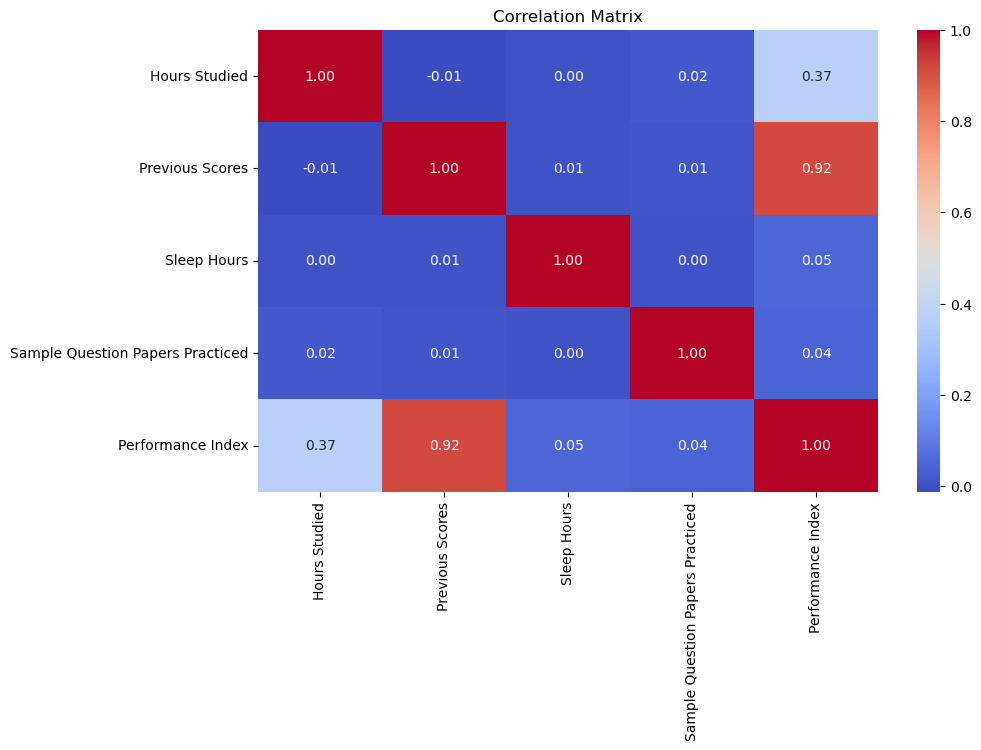

In [8]:
correlation_matrix(df)

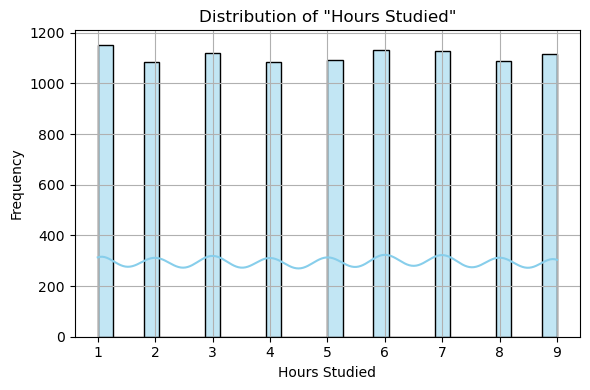

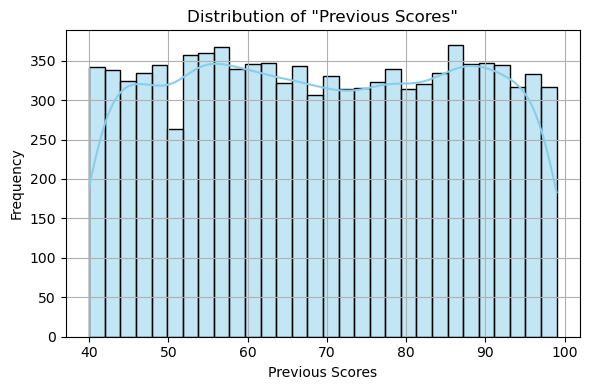

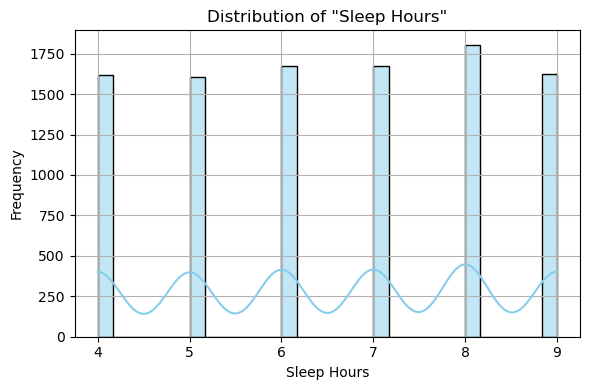

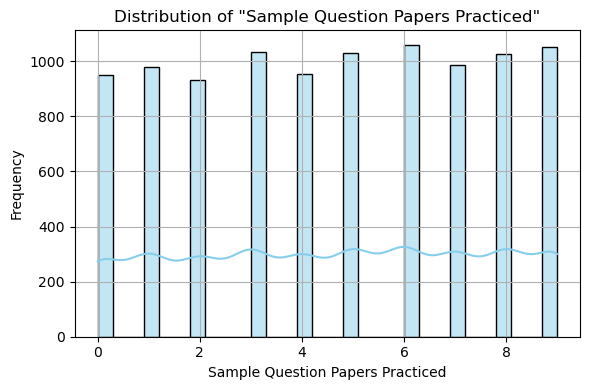

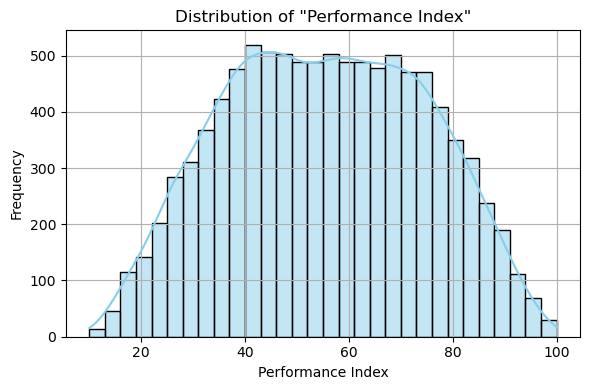

In [9]:
plot_distributions(df)

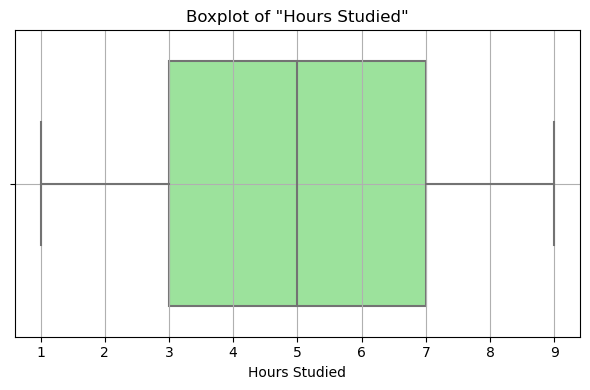

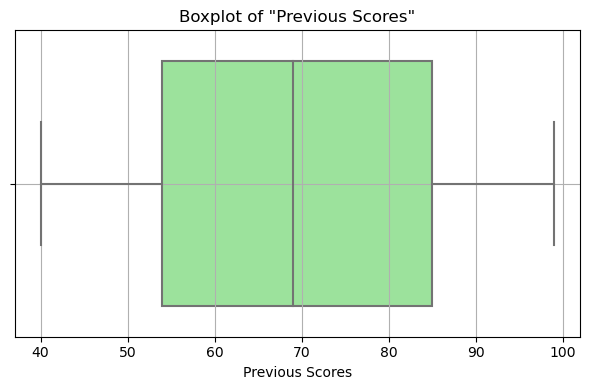

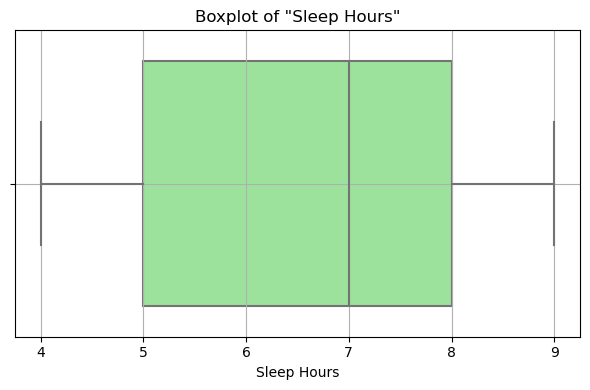

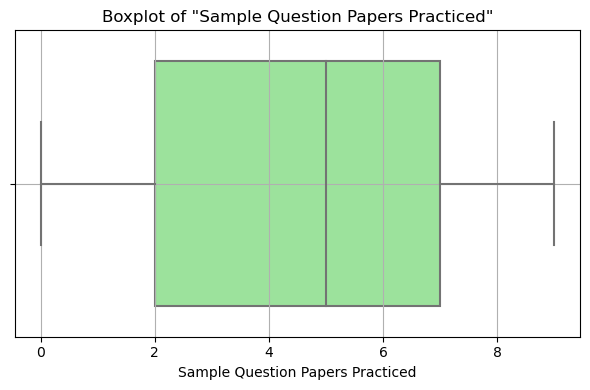

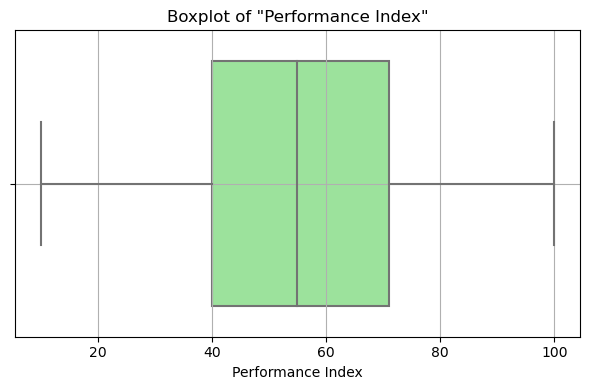

In [10]:
plot_boxplots(df)

#### Seems the data is so cleand so no data prepration is needed only needed for Extracurricular Activities

In [11]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

### Set the linear reggression model

In [13]:
model=linear_regression(df, target_col='Performance Index')

🔹 Linear Regression
R² Score: 0.9889832909573145
MSE: 4.082628398521854


### Now I wanted to print predicted vs actual values and the best fit line

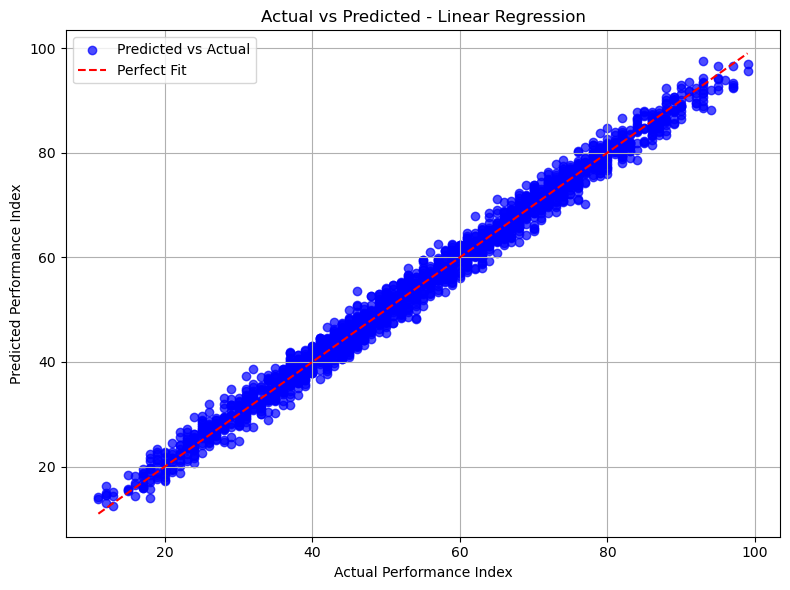

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
